# THÔNG TIN NHÓM 10:
1. Lê Nguyễn Minh Huy - 20521394
2. Lê Gia Khang - 21522189
3. Võ Huy Hoàng - 21522103
4. Phạm Thị Trâm Anh - 21520146
# Bài tập: Lấy dữ liệu của lớp và huấn luyện model.

Tài liệu tham khảo: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

# 1. Chạy code có sẵn từ sklearn

In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

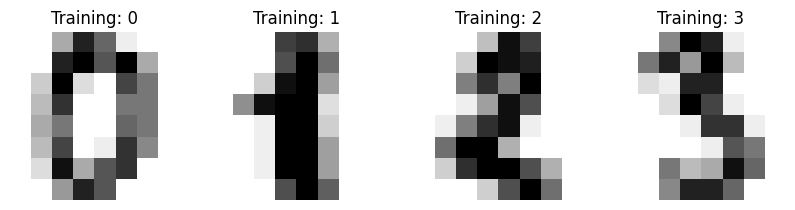

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


In [ ]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

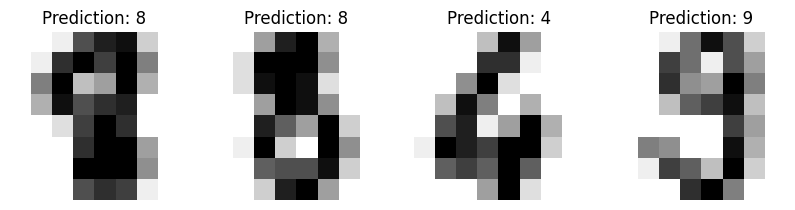

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


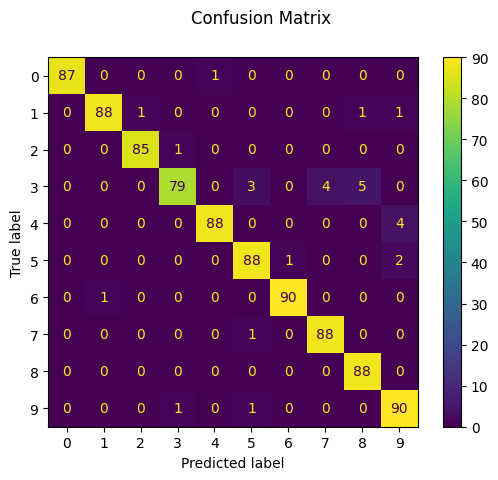

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Nhận xét:
- Số 3 thường hay bị nhầm sang số 5, 7 và 8.
- Số 4 thường hay bị nhầm sang số 0.

Nguyên nhân có thể là do những test đó là đặc biệt, có thể là số đó của một người nào đó viết mà chỉ có người đó mới hiểu.

# 2. Thử dùng model trên để nhận ra số viết tay của mình
Data: https://drive.google.com/drive/folders/1b4njikbk64ByHS44ckJ9jVybnGqEAy6j?usp=sharing

Vì model được huấn luyện trên bộ dữ liệu MNIST nên cần xử lý dữ liệu của nhóm sao cho tương đồng với MNIST.

Giới thiệu sơ qua MNIST:
- Training: 60,000 examples và Testing: 10,000 examples.
- grayscale.
- Có kích thước cố định.
- Có giá trị từ 0 - 9.

## Xử lý dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Thư viện cần sử dụng

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [ ]:
!git clone https://github.com/IrisPham74/HandWrittenCS117.git


fatal: destination path 'HandWrittenCS117' already exists and is not an empty directory.


In [ ]:
# Chuyển đổi các data dạng ảnh thành dạng array
def read_data(foder_path, reverse_colors = False):
    test_data = []
    test_labels = []
    new_image_shape = (8, 8) #kích thước mới của anh
    #Duyệt qua các thư mục con trong thư mục "Digits"
    for root, dirs, files in os.walk(folder_path):
        for dir_name in dirs:
            if dir_name.isdigit():
                label = int(dir_name)
                #Lấy ảnh trong thư mục có đuôi jpg
                for i in range(50):
                    file_name = str(i) + ".jpg"
                    file_path = os.path.join(root, dir_name, file_name)
                    # Đọc ảnh và chuyển đổi thành mảng numpy
                    image = Image.open(file_path).convert("L") #chuyển đổi sang ảnh xám
                    # Đảo màu
                    if reverse_colors:
                        image = Image.eval(image, lambda x: 255 - x)
                    image = image.resize(new_image_shape) #resize lại ảnh
                    image_array = np.array(image)
                    image_scaled = image_array / 255.0 * 16.0
                    test_data.append(image_scaled)
                    test_labels.append(label)
    #Chuyển đổi danh sách thảnh mảng numpy
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    #kiểm tra kích thước
    print("Kích thước dữ liệu kiểm tra:", test_data.shape)
    print("Kích thước nhãn kiểm tra:", test_labels.shape)
    return test_data, test_labels

Hiện thị một số test để kiểm tra

In [ ]:
def show_img(test_data, test_labels):
  #chọn số lượng ảnh hiện thị
    num_images = 5
    #Lấy ngẫu nhiên ảnh
    indices = np.random.choice(test_data.shape[0], num_images, replace=False)
    images = test_data[indices]
    labels = test_labels[indices]
    #hiển thị ảnh và nhãn
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## Lấy bộ dữ liệu digits để train

In [ ]:
digits = datasets.load_digits()
# làm phẳng ảnh
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Tạo bộ phân loại: SVM.SVC
clf = svm.SVC(gamma=0.001)

X_train, y_train = data, digits.target

clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [ ]:
X_train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Test dữ liệu chữ viết tay của lớp

Data nhóm sử dụng: https://github.com/IrisPham74/HandWrittenCS117

In [ ]:
folder_path = "/content/HandWrittenCS117"
test_data, test_labels = read_data(folder_path)

Kích thước dữ liệu kiểm tra: (500, 8, 8)
Kích thước nhãn kiểm tra: (500,)


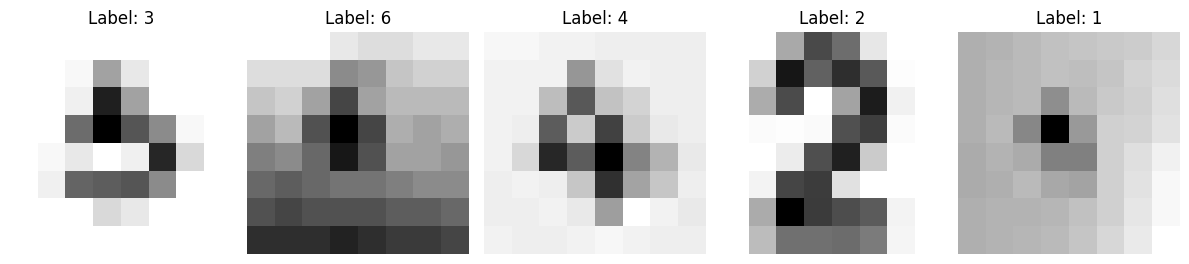

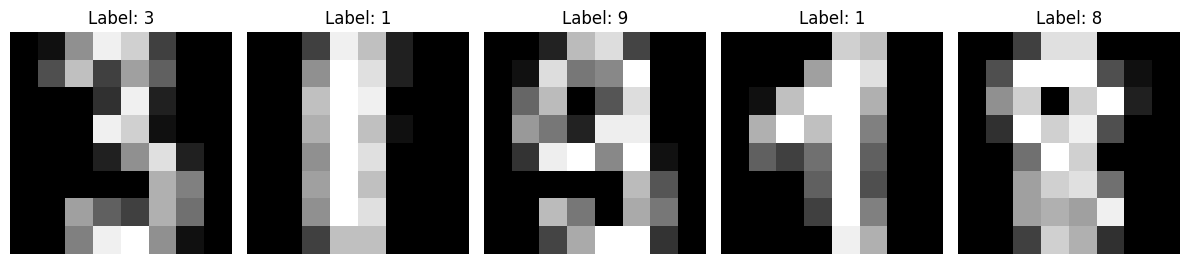

In [ ]:
#hiển thị ảnh của tập digits trên sklean và dữ liệu của nhóm
show_img(test_data, test_labels)
show_img(digits.images, digits.target)

Nhận xét: Ảnh của nhóm bị ngược màu cần phải đảo ngược màu lại lúc đọc ảnh để không bị ngược màu so với ảnh trong bộ digits



In [ ]:
test_data, test_labels = read_data(folder_path, True)

Kích thước dữ liệu kiểm tra: (500, 8, 8)
Kích thước nhãn kiểm tra: (500,)


Hiển thị lại hình ảnh xem có còn ngược màu không

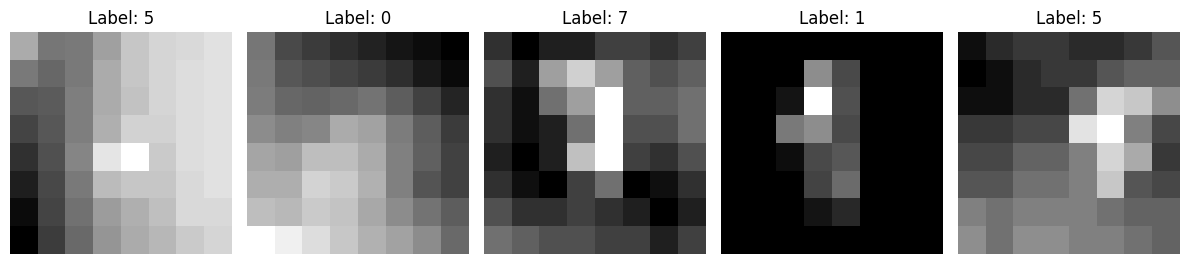

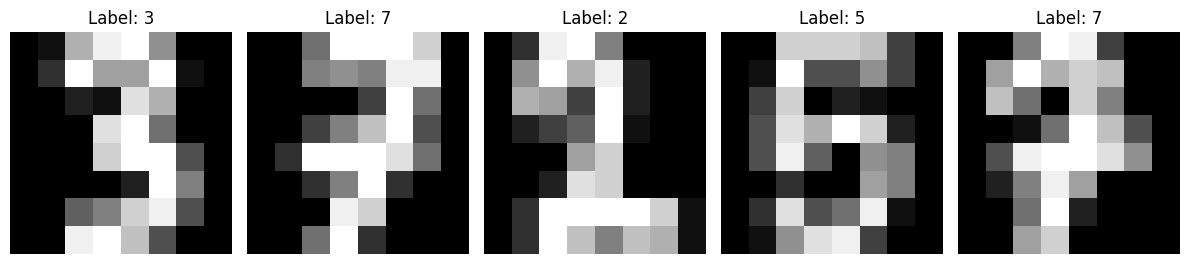

In [ ]:
show_img(test_data, test_labels)
show_img(digits.images, digits.target)

Nhận xét: Đã hết bị ngược màu

### Đánh giá

Predict dựa vào bộ dữ liệu test

In [ ]:
X_test, y_test = test_data, test_labels
X_test = X_test.reshape(X_test.shape[0], -1)
# Dự đoán giá trị của chữ số trên tập test
predicted = clf.predict(X_test)

**In confusion matrix**

Confusion matrix:
[[ 1 10  0  0  9  0  0  0 22  8]
 [ 0 10  0  0  0  0  0  0 31  9]
 [ 0  9  2  0  1  0  0  0 30  8]
 [ 0  7  0  1  1  0  0  0 25 16]
 [ 0 10  0  0  1  0  0  0 30  9]
 [ 0  8  0  0  0  0  0  0 13 29]
 [ 0  4  0  0  1  0  0  0 16 29]
 [ 0 10  0  0  1  0  0  0 28 11]
 [ 0 10  0  0  0  0  0  0 32  8]
 [ 0  7  0  0  0  0  0  0 21 22]]


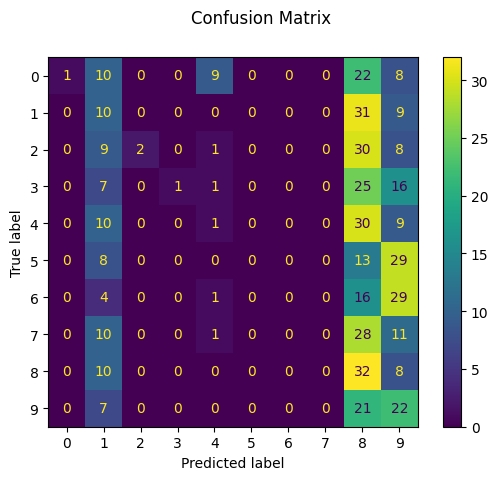

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.12      0.20      0.15        50
           2       1.00      0.04      0.08        50
           3       1.00      0.02      0.04        50
           4       0.07      0.02      0.03        50
           5       0.00      0.00      0.00        50
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        50
           8       0.13      0.64      0.21        50
           9       0.15      0.44      0.22        50

    accuracy                           0.14       500
   macro avg       0.35      0.14      0.08       500
weighted avg       0.35      0.14      0.08       500




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kết quả vẫn còn thấp, có thể là do màu nền, dùng thử chuyển đổi ảnh sang grayscale sau đó áp dụng thresholding để làm nổi bật các *nét*
 folder_v3: https://github.com/Honf03/desktop-tutorial

### Bộ dữ liệu đã qua xử lý lần 2

**Chuyển đổi ảnh sang grayscale sau đó áp dụng thresholding để làm nổi bật các nét**

In [ ]:
import os
import cv2

# Đường dẫn của folder digits_v2 được liên kết với google drive https://drive.google.com/drive/folders/1b4njikbk64ByHS44ckJ9jVybnGqEAy6j?usp=drive_link đã được up
# lên github: https://github.com/IrisPham74/HandWrittenCS117
folder_v2 = "/content/drive/MyDrive/TrainData/Data"

# Đường dẫn của folder digits_v2 được liên kết với google drive https://drive.google.com/drive/folders/1Dtka-H10jaoUL3k7A9uw8zrVtTsgfoOb?usp=drive_link đã được up
# lên github: https://github.com/Honf03/desktop-tutorial

folder_v3 = "/content/drive/MyDrive/TrainData/Data_2"

# Kiểm tra nếu folder digits_v3 chưa tồn tại thì tạo mới
if not os.path.exists(folder_v3):
    os.makedirs(folder_v3)

# Lặp qua từng folder con trong folder digits_v2
for folder_name in os.listdir(folder_v2):
    folder_path_v2 = os.path.join(folder_v2, folder_name)
    folder_path_v3 = os.path.join(folder_v3, folder_name)

    # Kiểm tra nếu folder con đã tồn tại trong folder digits_v3 thì bỏ qua
    if os.path.exists(folder_path_v3):
        continue

    # Tạo folder con trong folder digits_v3
    os.makedirs(folder_path_v3)

    # Lặp qua từng file ảnh trong folder con
    for file_name in os.listdir(folder_path_v2):
        if file_name.endswith(".jpg"):
            file_path_v2 = os.path.join(folder_path_v2, file_name)
            file_path_v3 = os.path.join(folder_path_v3, file_name)

            # Đọc ảnh từ folder digits_v2
            image = cv2.imread(file_path_v2)

            # Chuyển đổi ảnh sang grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Áp dụng thresholding để làm nổi bật các nét
            _, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

            # Lưu ảnh vào folder digits_v3
            cv2.imwrite(file_path_v3, thresholded)

In [ ]:
!git clone https://github.com/Honf03/desktop-tutorial.git

Cloning into 'desktop-tutorial'...
remote: Enumerating objects: 343, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 343 (delta 0), reused 3 (delta 0), pack-reused 340
Receiving objects: 100% (343/343), 97.25 MiB | 19.39 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (511/511), done.


In [ ]:
folder_path = "/content/desktop-tutorial"
test_data, test_labels = read_data(folder_path)

Kích thước dữ liệu kiểm tra: (500, 8, 8)
Kích thước nhãn kiểm tra: (500,)


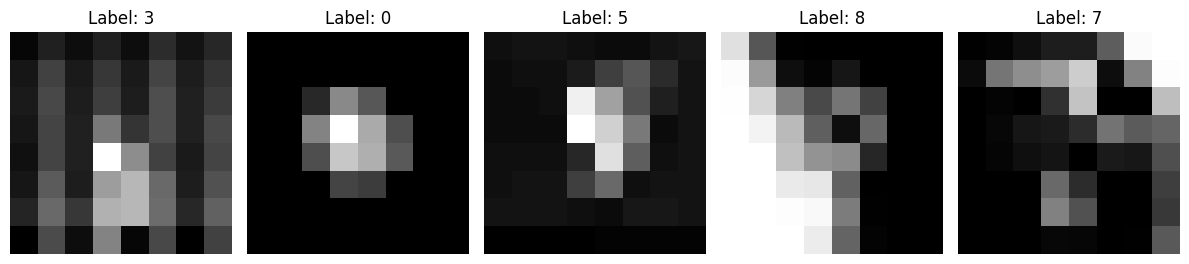

In [ ]:
show_img(test_data, test_labels)

### Đánh giá

Test lại

In [ ]:
X_test, y_test = test_data, test_labels
X_test = X_test.reshape(X_test.shape[0], -1)
# Dự đoán giá trị t
predicted = clf.predict(X_test)

Confusion matrix:
[[ 2 37  0  0  9  0  0  1  0  1]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0 34  5  0  6  0  0  1  4  0]
 [ 0 31  0  4  4  1  0  0  0 10]
 [ 0 28  0  0 17  0  0  0  0  5]
 [ 0 37  0  0  1  3  0  0  0  9]
 [ 0 22  0  0  2  2  0  1 12 11]
 [ 0 39  0  0  4  0  0  3  4  0]
 [ 1 33  0  0  2  0  0  0  5  9]
 [ 0 23  0  0  4  0  0  0  1 22]]


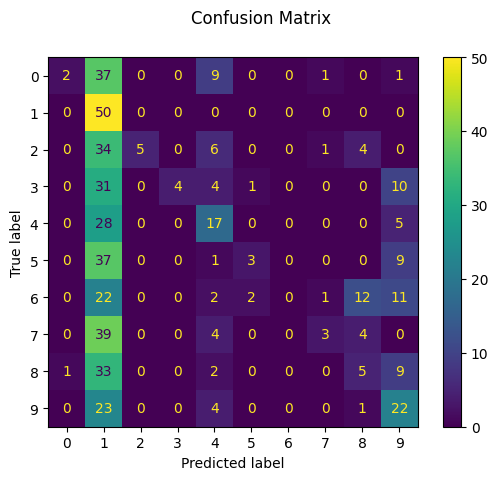

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.67      0.04      0.08        50
           1       0.15      1.00      0.26        50
           2       1.00      0.10      0.18        50
           3       1.00      0.08      0.15        50
           4       0.35      0.34      0.34        50
           5       0.50      0.06      0.11        50
           6       0.00      0.00      0.00        50
           7       0.50      0.06      0.11        50
           8       0.19      0.10      0.13        50
           9       0.33      0.44      0.38        50

    accuracy                           0.22       500
   macro avg       0.47      0.22      0.17       500
weighted avg       0.47      0.22      0.17       500




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
